In [1]:
import requests
import pandas as pd
import lxml
from lxml import html
from DataRetrieval import get_sp500_tickers, get_sp500_table, get_avail_tickers
from bs4 import *
import pickle
from basic_analysis_toolkit import BasicAnalysis, get_closest_date
from risk_model_toolkit import *
from frm_model import *
import pandas_datareader as pdr
import math
from company_toolkit import *
import time 
risk_free_rates = pd.read_csv('treasury_3month_interest_rate.csv', parse_dates = ['DATE'], index_col = 'DATE').reindex(pd.date_range(datetime.date(day=1, month=1, year=2000), datetime.date(day=1, month=1, year=2020), freq='B'))

In [9]:
sp500 = pickle.load(open('stock_dataframe.pickle', 'rb'))
cd = pickle.load(open('company_dictionary.pickle', 'rb'))
frm = pickle.load(open('frm_2017_current.pickle', 'rb'))
start = datetime.date(day=1, month=1, year=2017)
end_date = datetime.date.today()
#frm = create_frm(analysis, cd, start_frm, end_frm)

In [5]:
cd.get('CELG').income

,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research Development,Selling General and Administrative,Non Recurring,Others,Total Operating Expenses,Operating Income or Loss,...,Minority Interest,Net Income From Continuing Ops,Discontinued Operations,Extraordinary Items,Effect Of Accounting Changes,Other Items,Net Income,Net Income,Preferred Stock And Other Adjustments,Net Income Applicable To Common Shares
Revenue,,,,,,,,,,,,,,,,,,,,,
2018-12-31,15281000,1219000,14062000,Operating Expenses,5101000,3154000,-,-,9792000,5489000,...,-,4046000,-,-,-,-,Net Income,4046000,-,4046000
2017-12-31,13003000,1294000,11709000,Operating Expenses,3274000,2626000,-,-,7523000,5480000,...,-,2940000,-,-,-,-,Net Income,2940000,-,2940000
2016-12-31,11229000,1365000,9864000,Operating Expenses,3543000,2459000,-,-,7826000,3403000,...,-,1999000,-,-,-,-,Net Income,1999000,-,1999000
2015-12-31,9256000,1949000,7307000,Operating Expenses,2089000,2300000,-,-,6617000,2639000,...,-,1602000,-,-,-,-,Net Income,1602000,-,1602000


In [8]:
cd.get('ABBV').income

,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research Development,Selling General and Administrative,Non Recurring,Others,Total Operating Expenses,Operating Income or Loss,...,Minority Interest,Net Income From Continuing Ops,Discontinued Operations,Extraordinary Items,Effect Of Accounting Changes,Other Items,Net Income,Net Income,Preferred Stock And Other Adjustments,Net Income Applicable To Common Shares
Revenue,,,,,,,,,,,,,,,,,,,,,
2018-12-31,32753000,7718000,25035000,Operating Expenses,5259000,7365000,-,500000,20842000,11911000,...,-,5687000,-,-,-,-,Net Income,5687000,-,5657000
2017-12-31,28216000,6688000,21528000,Operating Expenses,5007000,5878000,-,500000,17573000,10643000,...,-,5309000,-,-,-,-,Net Income,5309000,-,5283000
2016-12-31,25638000,5793000,19845000,Operating Expenses,4385000,5837000,-,500000,16015000,9623000,...,-,5953000,-,-,-,-,Net Income,5953000,-,5923000
2015-12-31,22859000,4239000,18620000,Operating Expenses,4101000,5663000,-,500000,14003000,8856000,...,-,5144000,-,-,-,-,Net Income,5144000,-,5118000


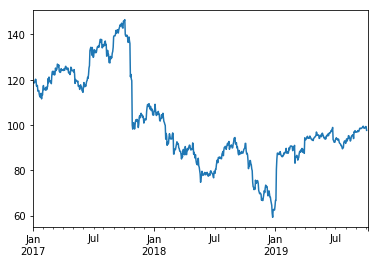

In [19]:
analysis.get_close('CELG', start, end_date, 'B').plot()

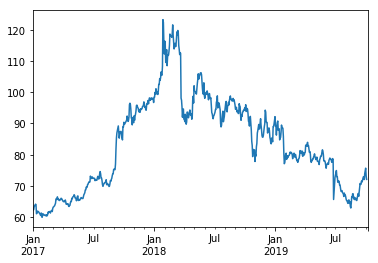

In [20]:
analysis.get_close('ABBV', start, end_date, 'B').plot()

In [22]:
abbv_dcf = RIC_DCF('ABBV', cd, analysis, end_date, .05, .019)

In [23]:
celg_dcf = RIC_DCF('CELG', cd, analysis, end_date, .05, .019)

In [24]:
abbv_dcf.explicit_period

,Sales Growth,RIC,NOPAT,Delta NOA,FCFFs (Nominal),Discount Rates,FCFFs (Real)
2019-12-31,0.12764,-0.003547,2.982987e+06,10202000.0,-7.219013e+06,0.932161,-6.729283e+06
2020-12-30,0.12764,-0.003547,2.946800e+06,10202000.0,-7.255200e+06,0.868924,-6.304221e+06
2021-12-30,0.12764,-0.003547,2.910613e+06,10202000.0,-7.291387e+06,0.809978,-5.905860e+06
2022-12-30,0.12764,-0.003547,2.874425e+06,10202000.0,-7.327575e+06,0.755030,-5.532536e+06
2023-12-30,0.12764,-0.003547,2.838238e+06,10202000.0,-7.363762e+06,0.703809,-5.182684e+06


In [27]:
abbv_dcf.fade_period

,Sales Growth,RIC,NOPAT,Delta NOA,FCFFS (Nominal),Discount Rates,FCFFs (Real)
2024-12-29,0.122208,0.000269,2.840983e+06,1.289074e+09,-1.286233e+09,0.703809,-9.052629e+08
2025-12-29,0.117048,0.003894,7.861171e+06,8.538659e+07,-7.752542e+07,0.656064,-5.086161e+07
2026-12-29,0.112145,0.007338,8.487780e+06,1.201329e+08,-1.116452e+08,0.611557,-6.827739e+07
2027-12-29,0.107488,0.010610,9.762433e+06,8.598536e+07,-7.622293e+07,0.570070,-4.345239e+07
2028-12-28,0.103064,0.013719,1.094203e+07,7.334204e+07,-6.240000e+07,0.531397,-3.315917e+07
2029-12-28,0.098861,0.016671,1.216476e+07,6.488531e+07,-5.272056e+07,0.495348,-2.611500e+07
2030-12-28,0.094867,0.019477,1.342851e+07,5.925229e+07,-4.582378e+07,0.461744,-2.115884e+07
2031-12-28,0.091074,0.022142,1.474045e+07,5.523474e+07,-4.049429e+07,0.430420,-1.742953e+07
2032-12-27,0.087470,0.024673,1.610328e+07,5.225686e+07,-3.615358e+07,0.401220,-1.450555e+07
2033-12-27,0.084047,0.027079,1.751832e+07,4.998173e+07,-3.246341e+07,0.374002,-1.214138e+07


In [28]:
cd.get('ABBV').profitability_analysis(cd)

,ABBV Estimate,ABBV 5 yr hist avg,Healthcare Avg
EBITDA Margin,0.387419,0.375905,0.176958
Depr/Sales,0.053888,0.047508,inf
Operating Margin,0.333530,0.328396,-inf
Tax Rate,0.169490,0.139052,-0.458588
NOPAT Margin,0.277000,0.282732,-inf


In [30]:
cd.get('CELG').income

,Total Revenue,Cost of Revenue,Gross Profit,Operating Expenses,Research Development,Selling General and Administrative,Non Recurring,Others,Total Operating Expenses,Operating Income or Loss,...,Minority Interest,Net Income From Continuing Ops,Discontinued Operations,Extraordinary Items,Effect Of Accounting Changes,Other Items,Net Income,Net Income,Preferred Stock And Other Adjustments,Net Income Applicable To Common Shares
Revenue,,,,,,,,,,,,,,,,,,,,,
2018-12-31,15281000,1219000,14062000,Operating Expenses,5101000,3154000,-,-,9792000,5489000,...,-,4046000,-,-,-,-,Net Income,4046000,-,4046000
2017-12-31,13003000,1294000,11709000,Operating Expenses,3274000,2626000,-,-,7523000,5480000,...,-,2940000,-,-,-,-,Net Income,2940000,-,2940000
2016-12-31,11229000,1365000,9864000,Operating Expenses,3543000,2459000,-,-,7826000,3403000,...,-,1999000,-,-,-,-,Net Income,1999000,-,1999000
2015-12-31,9256000,1949000,7307000,Operating Expenses,2089000,2300000,-,-,6617000,2639000,...,-,1602000,-,-,-,-,Net Income,1602000,-,1602000


In [31]:
cd.get('CELG').balance

,Cash And Cash Equivalents,Short Term Investments,Net Receivables,Inventory,Other Current Assets,Total Current Assets,Long Term Investments,"Property, plant and equipment",Goodwill,Intangible Assets,...,Misc. Stocks Options Warrants,Redeemable Preferred Stock,Preferred Stock,Common Stock,Retained Earnings,Treasury Stock,Capital Surplus,Other Stockholder Equity,Total stockholders' equity,Net Tangible Assets
Period Ending,,,,,,,,,,,,,,,,,,,,,
2018-12-31,4234000,1808000,2179000,458000,187000,9067000,1000,1367000,8003000,16213000,...,-,-,-,10000,17559000,-26386000,14978000,-50000,6161000,-18055000
2017-12-31,7013000,5029000,2001000,541000,161000,14892000,-,1070000,4866000,8436000,...,-,-,-,10000,13061000,-19956000,13806000,287000,6921000,-6381000
2016-12-31,6170000,1800000,1693000,498000,548000,10868000,32000,930000,4866000,10392000,...,-,-,-,10000,10074000,-15862000,12378000,419000,6600000,-8658000
2015-12-31,4880300,1671600,1420900,443400,754000,9400900,22400,814100,4879000,10858100,...,-,-,-,9400,8074400,-13284100,11119300,767700,5919000,-9818100


In [32]:
cd.get('CELG').cash_flow

,Net Income,Depreciation,Adjustments To Net Income,Changes In Accounts Receivables,Changes In Liabilities,Changes In Inventories,Changes In Other Operating Activities,Total Cash Flow From Operating Activities,Capital Expenditure,Investments,Other Cash flows from Investing Activities,Total Cash Flows From Investing Activities,Dividends Paid,Sale Purchase of Stock,Net Borrowings,Other Cash Flows from Financing Activities,Total Cash Flows From Financing Activities,Effect Of Exchange Rate Changes,Change In Cash and Cash Equivalents
Period Ending,,,,,,,,,,,,,,,,,,,
2018-12-31,4046000,635000,725000,-178000,331000,82000,-77000,5171000,-330000,2560000,-,-6418000,-,-,4452000,-40000,-1540000,8000,-2779000
2017-12-31,2940000,471000,-336000,-236000,293000,-42000,-73000,5246000,-279000,-2585000,-27000,-2891000,-,-,1564000,-40000,-1584000,72000,843000
2016-12-31,1999000,505000,926000,-222000,626000,-55000,85000,4165000,-236000,-765000,-1000,-1002000,-,-,1564000,-33000,-1834000,-39000,1290000
2015-12-31,1602000,402000,537000,-305000,564000,-51000,-326000,2785000,-286000,1730000,-8000,-6259000,-,-,7297000,-9000,4283000,-51000,758000


In [36]:
analysis.get_close('CELG', start, end_date, 'B')

2017-01-02    118.750000
2017-01-03    118.750000
2017-01-04    118.550003
2017-01-05    118.760002
2017-01-06    119.639999
2017-01-09    120.209999
2017-01-10    119.980003
2017-01-11    117.239998
2017-01-12    117.080002
2017-01-13    117.480003
2017-01-16    114.949997
2017-01-17    114.949997
2017-01-18    115.220001
2017-01-19    113.620003
2017-01-20    112.660004
2017-01-23    112.309998
2017-01-24    112.449997
2017-01-25    113.980003
2017-01-26    111.529999
2017-01-27    113.620003
2017-01-30    113.180000
2017-01-31    116.150002
2017-02-01    117.410004
2017-02-02    115.540001
2017-02-03    115.639999
2017-02-06    116.089996
2017-02-07    116.260002
2017-02-08    115.349998
2017-02-09    116.739998
2017-02-10    115.610001
                 ...    
2019-08-27     96.699997
2019-08-28     97.489998
2019-08-29     97.110001
2019-08-30     96.800003
2019-09-02     96.860001
2019-09-03     96.860001
2019-09-04     96.970001
2019-09-05     97.510002
2019-09-06     97.150002


In [37]:
analysis.get_percent_change('CELG', start, end_date, 'BM')

2017-01-31    0.000000
2017-02-28    0.063366
2017-03-31    0.007449
2017-04-28   -0.003054
2017-05-31   -0.077711
2017-06-30    0.135128
2017-07-31    0.042658
2017-08-31    0.025995
2017-09-29    0.049593
2017-10-31   -0.307571
2017-11-30   -0.001387
2017-12-29    0.035009
2018-01-31   -0.030663
2018-02-28   -0.138790
2018-03-30   -0.000574
2018-04-30    0.000345
2018-05-31   -0.096670
2018-06-29    0.009405
2018-07-31    0.134349
2018-08-31    0.048396
2018-09-28   -0.052515
2018-10-31   -0.199911
2018-11-30    0.008659
2018-12-31   -0.112573
2019-01-31    0.380247
2019-02-28   -0.060366
2019-03-29    0.134985
2019-04-30    0.003392
2019-05-31   -0.009191
2019-06-28   -0.014394
2019-07-31   -0.006274
2019-08-30    0.053778
2019-09-30    0.025826
Freq: BM, Name: (Close, CELG), dtype: float64

In [43]:
start = datetime.date(month=10, day=3, year=2018)
end = datetime.date.today()

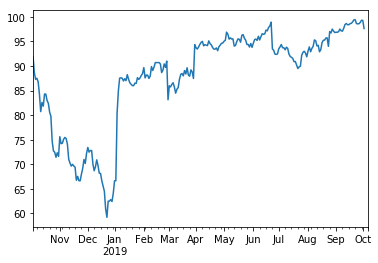

In [44]:
analysis.get_close('CELG', start, end, 'B').plot()